In [1]:
import numpy as np
import pandas as pd

In [2]:
test= pd.read_csv("q_dataset/ds_test.csv",index_col=0)
train= pd.read_csv("q_dataset/ds_train.csv",index_col=0)
whole= pd.read_csv("q_dataset/ds_whole.csv",index_col=0)

In [3]:
test

,glaucoma,age,ocular_pressure,MD,PSD,GHT,cornea_thickness,RNFL4.mean
RL,,,,,,,,
OS,0,62,16,-0.55,1.69,0,593,97.666667
OD,0,49,20,-1.03,2.23,0,602,106.000000
OD,0,46,17,0.50,1.25,0,544,125.666667
OS,0,38,18,-2.10,2.04,0,569,109.333333
OS,0,72,16,-0.32,2.17,0,588,94.000000
...,...,...,...,...,...,...,...,...
OS,1,58,25,-13.80,10.67,2,543,57.000000
OS,1,44,22,-19.57,13.97,2,524,42.666667
OS,1,60,24,-32.03,2.16,2,478,16.000000


In [4]:
train

,glaucoma,age,ocular_pressure,MD,PSD,GHT,cornea_thickness,RNFL4.mean
RL,,,,,,,,
OD,0,62,17,-0.54,1.81,0,558,103.333333
OS,0,62,17,-0.64,1.38,0,564,107.666667
OD,0,66,12,-1.65,2.89,2,490,162.000000
OD,0,81,13,-6.80,3.98,2,483,101.666667
OD,0,55,15,-0.08,2.06,0,580,114.000000
...,...,...,...,...,...,...,...,...
OD,1,42,17,-5.78,10.97,2,522,74.666667
OS,1,42,15,-0.83,3.28,2,526,81.666667
OS,1,58,21,-5.54,6.13,2,561,87.666667


In [5]:
whole

,glaucoma,age,ocular_pressure,MD,PSD,GHT,cornea_thickness,RNFL4.mean
RL,,,,,,,,
OD,0,62,17,-0.54,1.81,0,558,103.333333
OS,0,62,17,-0.64,1.38,0,564,107.666667
OD,0,66,12,-1.65,2.89,2,490,162.000000
OS,0,66,12,-1.14,3.88,2,495,99.000000
OD,1,53,24,-2.90,3.78,2,547,74.666667
...,...,...,...,...,...,...,...,...
OS,0,13,15,-2.44,2.49,0,531,109.666667
OD,0,55,15,-1.21,2.17,0,562,109.333333
OS,0,55,16,-0.84,1.86,0,566,110.333333


In [6]:
features_te=test.drop(columns=['glaucoma'])
target_te=test.glaucoma
features_tr=train.drop(columns=['glaucoma'])
target_tr=train.glaucoma

In [7]:
from sklearn.preprocessing import StandardScaler
transfer = StandardScaler()
features_te1= transfer.fit_transform(features_te)
features_tr1= transfer.fit_transform(features_tr)

In [8]:
features_te1.shape

(100, 7)

In [9]:
from sklearn.svm import SVC     #支持向量机

In [10]:
svc_linear = SVC(kernel = "linear")

In [11]:
svc_linear.fit(features_te1,target_te)

SVC(kernel='linear')

In [12]:
svc_linear.coef_

array([[-0.04918396,  0.85673299, -0.48071485,  0.99109579,  0.46745391,
        -0.38443803, -0.91605688]])

In [13]:
svc_linear.intercept_

array([1.45948222])

In [14]:
test_predict = svc_linear.predict(features_te1)
test_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [15]:
svc_linear.score(features_te1,target_te)

0.97

In [16]:
svc_poly = SVC(kernel="poly",degree=3,coef0=0.2)

In [17]:
svc_poly.fit(features_tr1, target_tr)

SVC(coef0=0.2, kernel='poly')

In [18]:
svc_poly.coef_

AttributeError: coef_ is only available when using a linear kernel

In [19]:
svc_poly.intercept_

array([0.9871652])

In [20]:
test_predict = svc_poly.predict(features_te1)
test_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [21]:
svc_poly.score(features_te1,target_te)

0.96

In [22]:
svc_rbf = SVC(kernel="rbf")

In [23]:
svc_rbf.fit(features_tr1,target_tr)

SVC()

In [24]:
svc_rbf.intercept_

array([0.35380744])

In [25]:
test_predict = svc_rbf.predict(features_te)
test_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [26]:
svc_rbf.score(features_te1,target_te)

0.97

In [27]:
from sklearn.metrics import confusion_matrix, roc_curve,accuracy_score

In [28]:
accuracy_score(target_te,test_predict)

0.6

In [29]:
confusion_matrix(target_te,test_predict)

array([[ 0, 40],
       [ 0, 60]], dtype=int64)

In [30]:
import seaborn as sns

In [31]:
sns.heatmap(confusion_matrix(target_te,test_predict),
           xticklabels=['B','M'],
           yticklabels=['B','M'])

<AxesSubplot:>

In [32]:
y_score = svc_rbf.decision_function(features_te1)

In [33]:
fpr, tpr, thresholds = roc_curve(target_te, y_score)

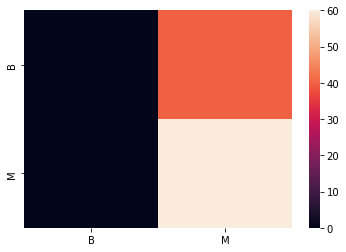

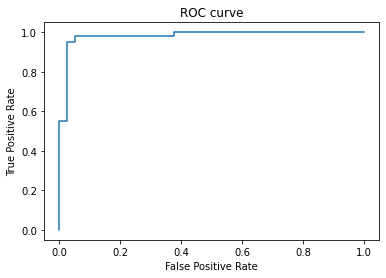

In [34]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [35]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

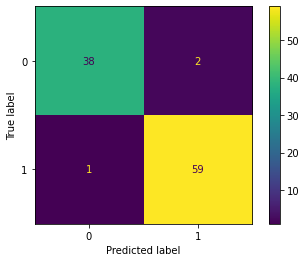

In [36]:
plot_confusion_matrix(svc_rbf, features_te1, target_te)
plt.show()

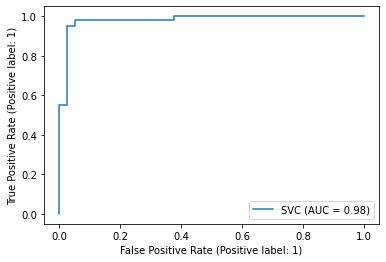

In [37]:
plot_roc_curve(svc_rbf, features_te1, target_te)
plt.show()

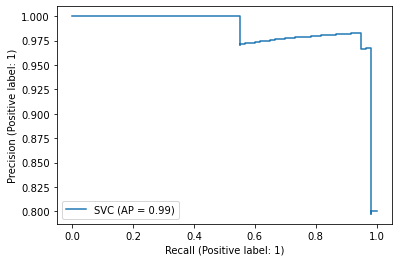

In [38]:
plot_precision_recall_curve(svc_rbf, features_te1, target_te)
plt.show()